# 股票K线图绘制

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mplfinance.original_flavor import candlestick_ochl
import seaborn as sns
from matplotlib.pylab import date2num
from datetime import datetime
import numpy as np


sns.set()

In [2]:
# 获取数据
read_data = pd.read_csv('./股票数据.csv')

read_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20221230,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,20221229,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,20221228,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,20221227,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,20221226,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [3]:
read_data['trade_date'] = read_data['trade_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))

read_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,2022-12-30,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,2022-12-29,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,2022-12-28,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,2022-12-27,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,2022-12-26,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [4]:
read_data.to_csv('./股票数据_修改日期.csv', index=False)

In [5]:
read_data = pd.read_csv('./股票数据_修改日期.csv')

read_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,2022-12-30,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,2022-12-29,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,2022-12-28,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,2022-12-27,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,2022-12-26,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [6]:
def date_to_num(dates):
    datetime_list = []
    for date in dates:
        date_time = datetime.strptime(date, '%Y-%m-%d')
        num_date = date2num(date_time)
        datetime_list.append(num_date)

    return datetime_list

In [7]:
data_array = read_data.values
data_array[:, 1] = date_to_num(data_array[:, 1])

In [8]:
quote = np.column_stack((data_array[:, 1:6][:, :2], data_array[:, 1:6][:, 4:], data_array[:, 1:6][:, 2:4]))
cut_data = quote[:20, :]

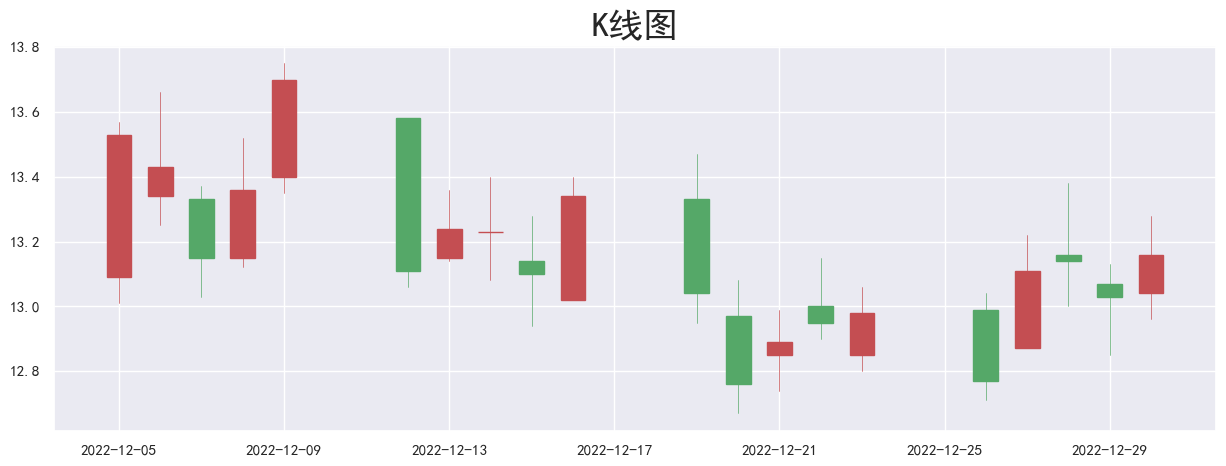

In [9]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, axes = plt.subplots(figsize=(15, 5))
candlestick_ochl(axes, cut_data, width=0.6, colorup='r', colordown='g', alpha=1.0)
plt.title('K线图', fontsize=25)
plt.grid(True)
axes.xaxis_date()
plt.savefig('./1_jupyter.png')
plt.show()
plt.close()